# Here we plot different examples of growth models, functional responses, and binding models

In [1]:
###############################################################################
#                          Libraries to use
###############################################################################

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy import interpolate

In [2]:
###############################################################################
#                     ODE system Model writing.
#     Here we define the different models we want graphs of.
#     Can assume all parameters are known.
#     
###############################################################################

# This is the Logistic growth model
def log_growth(x, t, ps):
    rho, K = ps
    return (rho*x*(1-x/K))

# This is the weak Allee growth model
def weak_allee_growth(x, t, ps):
    rho, K, A = ps
    return (rho*x*(1-x/K)*(1+x/A))

# This is the strong Allee growth model
def strong_allee_growth(x, t, ps):
    rho, K, B = ps
    return (rho*x*(1-x/K)*((x/B)-1))

In [3]:
time = np.linspace(0,10,500)
rho = 0.75
K = 10
A = 5
B = 5
x0_12 = 12
x0_8 = 8
x0_6 = 6
x0_4 = 4
x0_2 = 2
x0_1 = 1


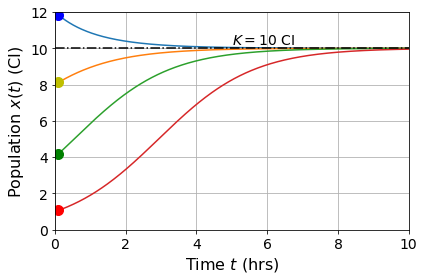

In [19]:
## Integrating and graphing Logistic growth

ps = rho, K
x12 = odeint(log_growth, x0_12, time, args=(ps,))
x8 = odeint(log_growth, x0_8, time, args=(ps,))
x6 = odeint(log_growth, x0_6, time, args=(ps,))
x4 = odeint(log_growth, x0_4, time, args=(ps,))
x2 = odeint(log_growth, x0_2, time, args=(ps,))
x1 = odeint(log_growth, x0_1, time, args=(ps,))

plt.plot(time, x12, label = r'$x_0 = 12$')
plt.plot(time[5], x12[5], 'bo', markersize = 10)
plt.plot(time, x8, label = r'$x_0 = 8$')
plt.plot(time[5], x8[5], color = 'orange', marker = 'o', markersize = 10)
plt.plot(time, x4, label = r'$x_0 = 4$')
plt.plot(time[5], x4[5], 'go', markersize = 10)
plt.plot(time, x1, label = r'$x_0 = 1$')
plt.plot(time[5], x1[5], 'ro', markersize = 10)
plt.axhline(y=K, color='k', linestyle='-.')
plt.text(5,10.2,r'$K=10$ CI', fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,12)
plt.xlabel(r'Time $t$ (hrs)', fontsize = 16)
plt.ylabel(r'Population $x(t)$ (CI)', fontsize = 16)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.grid()
plt.tight_layout()
plt.show()

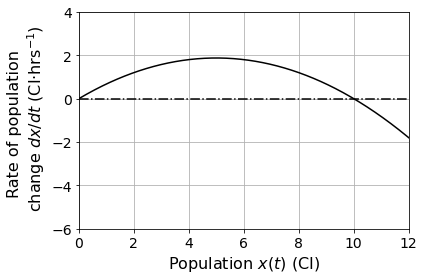

In [6]:
## Graphing dx/dt versus x for logistic growth

xrange = np.linspace(0,12,500)
xdot = log_growth(xrange, time, ps)

plt.plot(xrange, xdot, 'k-')
plt.xlim(0,12)
plt.ylim(-6,4)
plt.xlabel(r'Population $x(t)$ (CI)', fontsize = 16)
plt.ylabel('Rate of population \n change '+ r'$dx/dt$ (CI'+r'$\cdot$'+'hrs'+r'$^{-1}$)', fontsize = 16)
plt.axhline(y=0, color='k', linestyle='-.')
plt.grid()
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.tight_layout()
plt.show()

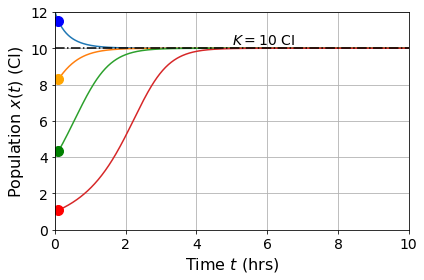

In [21]:
## Integrating and graphing Weak Allee growth

ps = rho, K, A
x12 = odeint(weak_allee_growth, x0_12, time, args=(ps,))
x8 = odeint(weak_allee_growth, x0_8, time, args=(ps,))
x6 = odeint(weak_allee_growth, x0_6, time, args=(ps,))
x4 = odeint(weak_allee_growth, x0_4, time, args=(ps,))
x2 = odeint(weak_allee_growth, x0_2, time, args=(ps,))
x1 = odeint(weak_allee_growth, x0_1, time, args=(ps,))

plt.plot(time, x12, label = r'$x_0 = 12$')
plt.plot(time[5], x12[5], 'bo', markersize = 10)
plt.plot(time, x8, label = r'$x_0 = 8$')
plt.plot(time[5], x8[5], color = 'orange', marker = 'o', markersize = 10)
plt.plot(time, x4, label = r'$x_0 = 4$')
plt.plot(time[5], x4[5], 'go', markersize = 10)
plt.plot(time, x1, label = r'$x_0 = 1$')
plt.plot(time[5], x1[5], 'ro', markersize = 10)
plt.axhline(y=K, color='k', linestyle='-.')
plt.text(5,10.2,r'$K = 10$ CI', fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,12)
plt.xlabel(r'Time $t$ (hrs)', fontsize = 16)
plt.ylabel(r'Population $x(t)$ (CI)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.tight_layout()
plt.show()

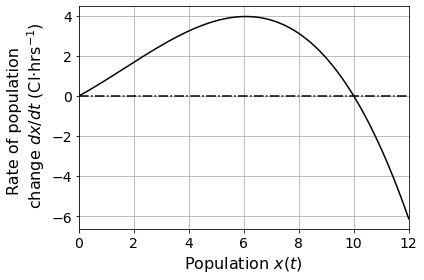

In [8]:
## Graphing dx/dt versus x for Weak Allee growth

xrange = np.linspace(0,12,500)
xdot = weak_allee_growth(xrange, time, ps)

plt.plot(xrange, xdot, 'k-')
plt.xlim(0,12)
#plt.ylim(-1.75,2)
plt.xlabel(r'Population $x(t)$', fontsize = 16)
plt.ylabel('Rate of population \n change '+ r'$dx/dt$ (CI'+r'$\cdot$'+'hrs'+r'$^{-1}$)', fontsize = 16)
plt.axhline(y=0, color='k', linestyle='-.')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.tight_layout()
plt.show()

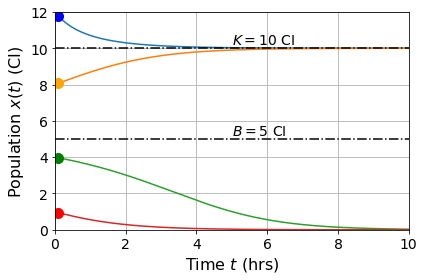

In [24]:
## Integrating and graphing Strong Allee growth

ps = rho, K, B
x12 = odeint(strong_allee_growth, x0_12, time, args=(ps,))
x8 = odeint(strong_allee_growth, x0_8, time, args=(ps,))
x6 = odeint(strong_allee_growth, x0_6, time, args=(ps,))
x4 = odeint(strong_allee_growth, x0_4, time, args=(ps,))
x2 = odeint(strong_allee_growth, x0_2, time, args=(ps,))
x1 = odeint(strong_allee_growth, x0_1, time, args=(ps,))

plt.plot(time, x12, label = r'$x_0 = 12$')
plt.plot(time[5], x12[5], 'bo', markersize = 10)
plt.plot(time, x8, label = r'$x_0 = 8$')
plt.plot(time[5], x8[5], color = 'orange', marker = 'o', markersize = 10)
plt.plot(time, x4, label = r'$x_0 = 4$')
plt.plot(time[5], x4[5], 'go', markersize = 10)
plt.plot(time, x1, label = r'$x_0 = 1$')
plt.plot(time[5], x1[5], 'ro', markersize = 10)
plt.axhline(y=K, color='k', linestyle='-.')
plt.axhline(y=B, color='k', linestyle='-.')
plt.text(5,10.2,r'$K = 10$ CI', fontsize = 14)
plt.text(5,5.2,r'$B = 5$ CI', fontsize = 14)
plt.xlim(0,10)
plt.ylim(0,12)
plt.xlabel(r'Time $t$ (hrs)', fontsize = 16)
plt.ylabel(r'Population $x(t)$ (CI)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.tight_layout()
plt.savefig(fname='/Users/alexwork/Desktop/strong_allee_growth.png', dpi = 300, bbox_inches = 'tight')
plt.show()

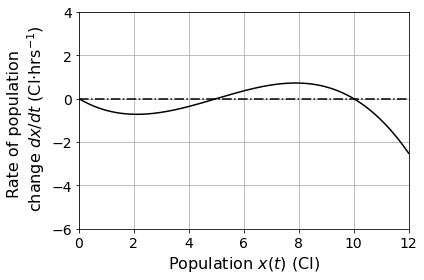

In [11]:
## Graphing dx/dt versus x for Strong Allee growth

xrange = np.linspace(0,12,500)
xdot = strong_allee_growth(xrange, time, ps)

plt.plot(xrange, xdot, 'k-')
plt.xlim(0,12)
plt.ylim(-6,4)
plt.xlabel(r'Population $x(t)$ (CI)', fontsize = 16)
plt.ylabel('Rate of population \n change '+ r'$dx/dt$ (CI'+r'$\cdot$'+'hrs'+r'$^{-1}$)', fontsize = 16)
plt.axhline(y=0, color='k', linestyle='-.')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()
plt.tight_layout()
plt.show()

# Now we switch to graphing functional response

In [26]:
###############################################################################
#                     ODE system Model writing.
#     Here we define the different models we want graphs of.
#     Can assume all parameters are known.
#     
###############################################################################

# This is the Logistic growth model
def typeI_FR(x, p):
    return (p*x)

# This is the weak Allee growth model
def typeII_FR(x, p, g):
    return (p*x/(g+x))

# This is the strong Allee growth model
def typeIII_FR(x, p, g):
    return (p*x**2/(g**2+x**2))

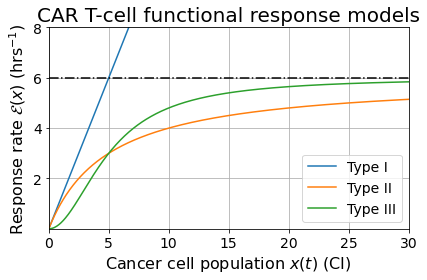

In [36]:
xrange = np.linspace(0,30,500)
p = 6
g = 5


fx_I = typeI_FR(xrange, p/g)
fx_II = typeII_FR(xrange, p, g)
fx_III = typeIII_FR(xrange, p, g)

fig,ax = plt.subplots()
plt.plot(xrange, fx_I, label = 'Type I')
plt.plot(xrange, fx_II, label = 'Type II')
plt.plot(xrange, fx_III, label = 'Type III')
plt.axhline(y=p, color='k', linestyle='-.')
plt.ylim(0,1)
plt.xlim(0,30)
ax.legend(loc = 'lower right', fontsize = 14)
ax.set_yticks([2, 4, 6, 8], minor=False)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Cancer cell population '+r'$x(t)$ (CI)', fontsize = 16)
plt.ylabel('Response rate '+r'$\mathcal{E}(x)$ (hrs'+r'$^{-1}$)', fontsize = 16)
# plt.title('Per-CAR T-cell expansion rate', fontsize = 20)
plt.title('CAR T-cell functional response models', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()

# Now we switch to graphing antigen binding

In [37]:
###############################################################################
#                     ODE system Model writing.
#     Here we define the different models we want graphs of.
#     Can assume all parameters are known.
#     
###############################################################################

# This is the Logistic growth model
def single_binding(y, a, h):
    m = a/h
    return (m*y)

# This is the weak Allee growth model
def double_binding(y, a, b, h, k):
    return ((a*y)/(h+k*y) + (b*y*y)/(h+k*y))

def eff_double_binding(y, a, b, h, k):
    return((a*y/h) + ((b*h-a*k)*y*y)/(h^2))

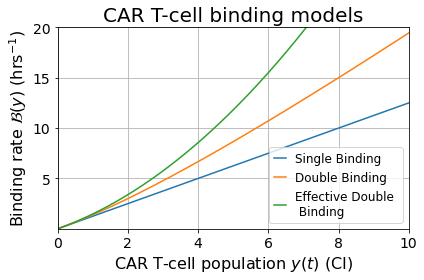

In [39]:
yrange = np.linspace(0,20,500)
m = 3 #goes to a/h
a = 20
b = 10 
h = 10 
k = 2


single_bind = single_binding(yrange, 20, 16)
double_bind = double_binding(yrange, 20, 5, 16, k)
double_bind_eff = eff_double_binding(yrange, 20, 2.75, 16, k)

fig,ax = plt.subplots()
ax.plot(yrange, single_bind, label = 'Single Binding')
ax.plot(yrange, double_bind, label = 'Double Binding')
ax.plot(yrange, double_bind_eff, label = 'Effective Double \n Binding')

plt.ylim(0,20)
plt.xlim(0,10)
ax.legend(loc = 'lower right', fontsize = 12, handlelength = 1)
plt.xticks(fontsize = 14)
ax.set_yticks([5, 10, 15, 20], minor=False)
plt.yticks(fontsize = 14)
plt.xlabel('CAR T-cell population '+r'$y(t)$ (CI)', fontsize = 16)
plt.ylabel('Binding rate '+r'$\mathcal{B}(y)$ (hrs'+r'$^{-1}$)', fontsize = 16)
plt.title('CAR T-cell binding models', fontsize = 20)
plt.grid()
fig.tight_layout()
plt.show()